In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit, logit, comb
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import os

In [2]:
data_dir = '/mnt/lareaulab/cfbuenabadn/data_sc_regulation/data_autocorrelation/'
song_mrna_event = pd.read_csv(data_dir + 'song/mrna_per_event.tab', sep='\t', index_col=0)
song_rd = pd.read_csv(data_dir + 'song/rd_pc2.tab', sep='\t', index_col=0)
song_PSI = pd.read_csv(data_dir + 'song/skipped_exons_psi.tab', sep='\t', index_col=0)
song_psix = pd.read_csv('song.scores.txt', sep='\t', index_col=0)
#song_pseudotime = pd.read_csv('~/data_sc_regulation/song/pseudotime.tab', sep='\t', index_col=0)

In [3]:
random_df = pd.DataFrame()
for mean_var in os.listdir('song_pvals'):
    with open('song_pvals/' + mean_var) as fh:
        random_scores = [np.float(x.rstrip()) for x in fh.readlines()]
    mean_var = mean_var.split('.')[0]
    random_df[mean_var] = random_scores
    

In [38]:
song_psix.loc[[x for x in song_psix.index if 'RPN' in x]]

,bin,L_score,pvals,qvals,norm_pvals,norm_qvals
SNRPN_4,mean_1_var_1,-0.001649,0.354645,0.549623,3.545480e-01,NaN
SNRPN_5,mean_1_var_1,-0.002079,0.354645,0.549623,3.568678e-01,NaN
SNRPN_12,mean_2_var_2,0.119222,0.139860,0.332499,1.455154e-01,NaN
SNRPN_24,mean_2_var_4,-0.074534,0.716284,0.828511,7.087843e-01,NaN
RPN2_8,mean_3_var_2,0.677046,0.000999,0.010170,3.324799e-07,NaN


RPN2_8
0.6770455876201974


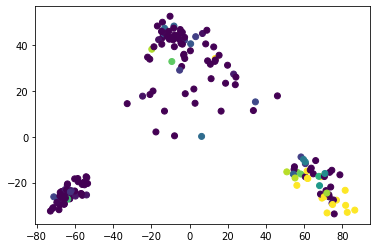

In [39]:
for exon in ['RPN2_8']:
    print(exon)
    print(song_psix.loc[exon, 'L_score'])
    plt.scatter(song_rd.PC_1, song_rd.PC_2, c=song_PSI.loc[exon])
    plt.show()

100%|██████████| 2606/2606 [00:16<00:00, 162.57it/s]


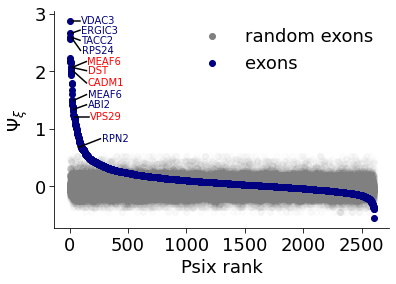

In [42]:
fig = plt.figure()
ax  = plt.subplot(1,1,1)
i = 1

ax.scatter([100], [-0.05], c='gray', label='random exons')

for mean_var in tqdm(song_psix.sort_values('L_score')[::-1].bin):
    subset = np.random.choice(random_df[mean_var], 50, replace=False)
    ax.scatter([i]*50, subset, c='gray', alpha=0.02)
    i += 1


plt.text(100, song_psix.loc['VDAC3_5'].L_score-0.05, 'VDAC3', c='navy')   #
plt.plot([20, 90], [song_psix.loc['VDAC3_5'].L_score, song_psix.loc['VDAC3_5'].L_score],c='black')

plt.text(100, song_psix.loc['ERGIC3_5'].L_score, 'ERGIC3', c='navy')   #
plt.plot([20, 90], [song_psix.loc['ERGIC3_5'].L_score, song_psix.loc['ERGIC3_5'].L_score+0.05],c='black')

plt.text(100, song_psix.loc['TACC2_9'].L_score-0.1, 'TACC2', c='navy')   
plt.plot([20, 90], [song_psix.loc['TACC2_9'].L_score, song_psix.loc['TACC2_9'].L_score-0.05],c='black')

plt.text(104, song_psix.loc['RPS24_4'].L_score-0.25, 'RPS24', c='navy')    
plt.plot([24, 94], [song_psix.loc['RPS24_4'].L_score, song_psix.loc['RPS24_4'].L_score-0.2],c='black')

plt.text(154, song_psix.loc['MEAF6_3'].L_score+0.05, 'MEAF6', c='red')   
plt.plot([25, 144], [song_psix.loc['MEAF6_3'].L_score, song_psix.loc['MEAF6_3'].L_score+0.1],c='black')


plt.text(155, song_psix.loc['DST_5'].L_score-0.1, 'DST', c='red')   
plt.plot([35, 145], [song_psix.loc['DST_5'].L_score, song_psix.loc['DST_5'].L_score-0.05],c='black')

plt.text(155, song_psix.loc['CADM1_4'].L_score-0.25, 'CADM1', c='red')   
plt.plot([35, 145], [song_psix.loc['CADM1_4'].L_score, song_psix.loc['CADM1_4'].L_score-0.2],c='black')

plt.text(175, song_psix.loc['VPS29_8'].L_score-0.05, 'VPS29', c='red')   
plt.plot([45, 165], [song_psix.loc['VPS29_8'].L_score, song_psix.loc['VPS29_8'].L_score],c='black')



plt.text(155, song_psix.loc['MEAF6_2'].L_score+0.05, 'MEAF6', c='navy')   
plt.plot([35, 145], [song_psix.loc['MEAF6_2'].L_score, song_psix.loc['MEAF6_2'].L_score+0.1],c='black')

plt.text(155, song_psix.loc['ABI2_9'].L_score+0.03, 'ABI2', c='navy')   
plt.plot([35, 145], [song_psix.loc['ABI2_9'].L_score, song_psix.loc['ABI2_9'].L_score+0.08],c='black')


plt.text(275, song_psix.loc['RPN2_8'].L_score+0.1, 'RPN2', c='navy')   
plt.plot([75, 265], [song_psix.loc['RPN2_8'].L_score, song_psix.loc['RPN2_8'].L_score+0.15],c='black')


ax.scatter(np.arange(1, len(song_psix.index)+1), song_psix.sort_values('L_score')[::-1].L_score, c = 'navy',
          label='exons')
    
plt.xlabel('Psix rank', fontsize=18)
plt.ylabel(r'$\Psi_{\xi}$', fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(labelsize=18, length=5)
# plt.title('Neurogenesis exons', fontsize=18)
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
plt.legend(frameon=False, fontsize=18)